In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df = pd.read_csv('Plantation_2.csv', encoding='utf-8')

df.columns = [c.strip() for c in df.columns]
numeric_cols = ['Planning Completed (No. of Seedling)', 'No. of Seedling Planted', 'No. of Pits Dug']

for col in numeric_cols:    
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '', regex=False), errors='coerce').fillna(0).astype(int)
   
existing_numeric = [c for c in numeric_cols if c in df.columns]

display(df.head(10))

,Sr. No.,District,Taluka,No. of Site Registered,Planning Completed (No. of Seedling),No. of Pits Dug,No. of Seedling Planted,No of Participants
0,1,Ahilyanagar,Akole,579,267518,263116,263116,334
1,2,Ahilyanagar,Jamkhed,156,139439,79258,79258,0
2,3,Ahilyanagar,Karjat,115,106804,103904,103904,0
3,4,Ahilyanagar,Kopargaon,227,86586,85586,85586,0
4,5,Ahilyanagar,Nagar,578,147272,147272,147272,0
5,6,Ahilyanagar,Newasa,367,297795,294395,294395,0
6,7,Ahilyanagar,Parner,265,225278,206383,193847,0
7,8,Ahilyanagar,Pathardi,289,166028,165824,165824,472
8,9,Ahilyanagar,Rahata,377,113260,110260,110260,0
9,10,Ahilyanagar,Rahuri,391,145580,145580,145580,0


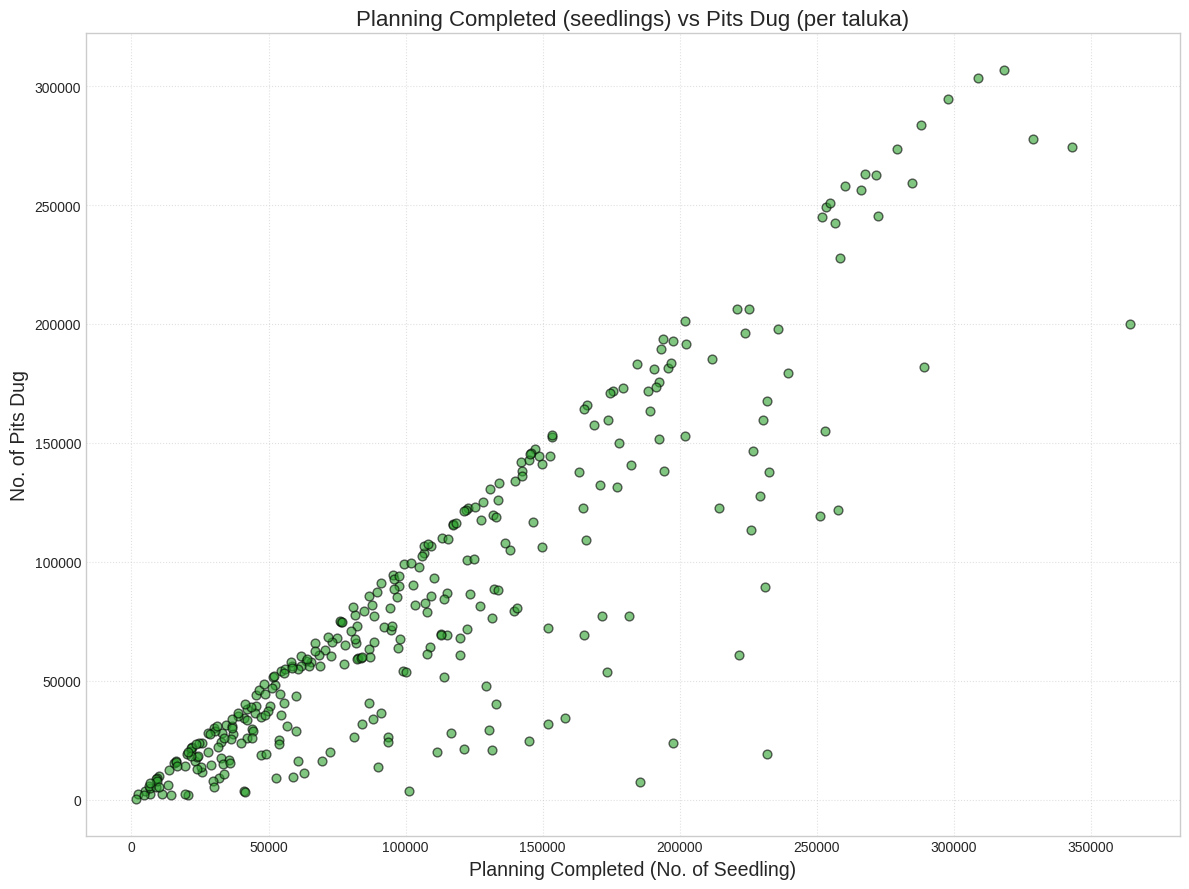

In [2]:
xcol = 'Planning Completed (No. of Seedling)'
ycol = 'No. of Pits Dug'

cols = [xcol, ycol]
df_plot = df.copy()
if all(c in df_plot.columns for c in cols):
    mask = pd.Series(True, index=df_plot.index)
    for c in cols:
        q1 = df_plot[c].quantile(0.25)
        q3 = df_plot[c].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        mask &= df_plot[c].between(lower, upper)
    df_plot = df_plot[mask]

plt.figure(figsize=(12,9))
plt.scatter(df_plot[xcol], df_plot[ycol], alpha=0.6, s=40, color='tab:green', edgecolor='k')
plt.xlabel(xcol, fontsize=14)
plt.ylabel(ycol, fontsize=14)
plt.title('Planning Completed (seedlings) vs Pits Dug (per taluka)', fontsize=16)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

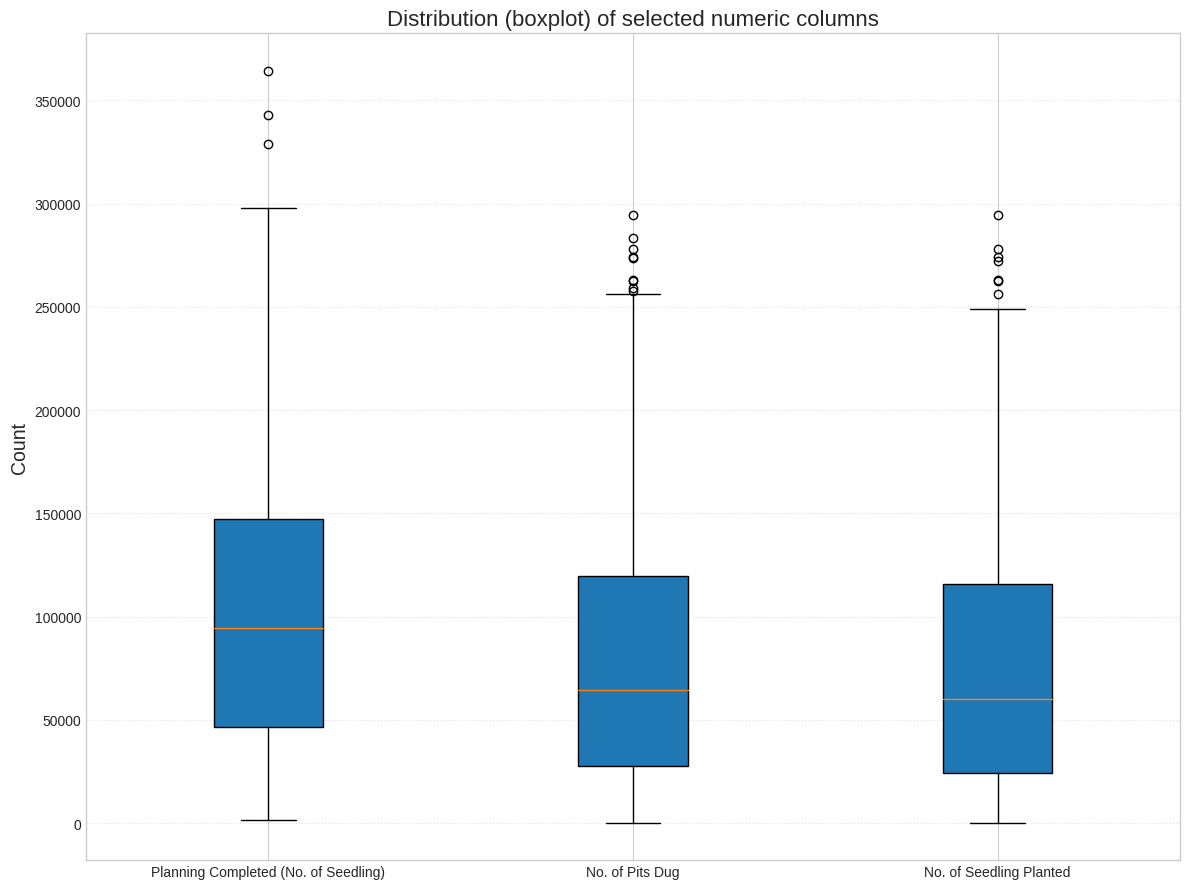

In [3]:
cols_for_box = ['Planning Completed (No. of Seedling)', 'No. of Pits Dug', 'No. of Seedling Planted']
existing_box = [c for c in cols_for_box if c in df.columns]

df_box = df.copy()
for c in existing_box:
    df_box[c] = pd.to_numeric(df_box[c], errors='coerce')
    
mask = pd.Series(True, index=df_box.index)
for c in existing_box:
    q1 = df_box[c].quantile(0.25)
    q3 = df_box[c].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    mask &= df_box[c].between(lower, upper)
df_filtered = df_box[mask].copy()
removed = len(df_box) - len(df_filtered)

arrays = []
labels = []
for c in existing_box:
    arr = df_filtered[c].dropna()
    if len(arr) > 0:
        arrays.append(arr)
        labels.append(c)
        
plt.figure(figsize=(12,9))
plt.boxplot(arrays, labels=labels, vert=True, patch_artist=True)
plt.title('Distribution (boxplot) of selected numeric columns', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

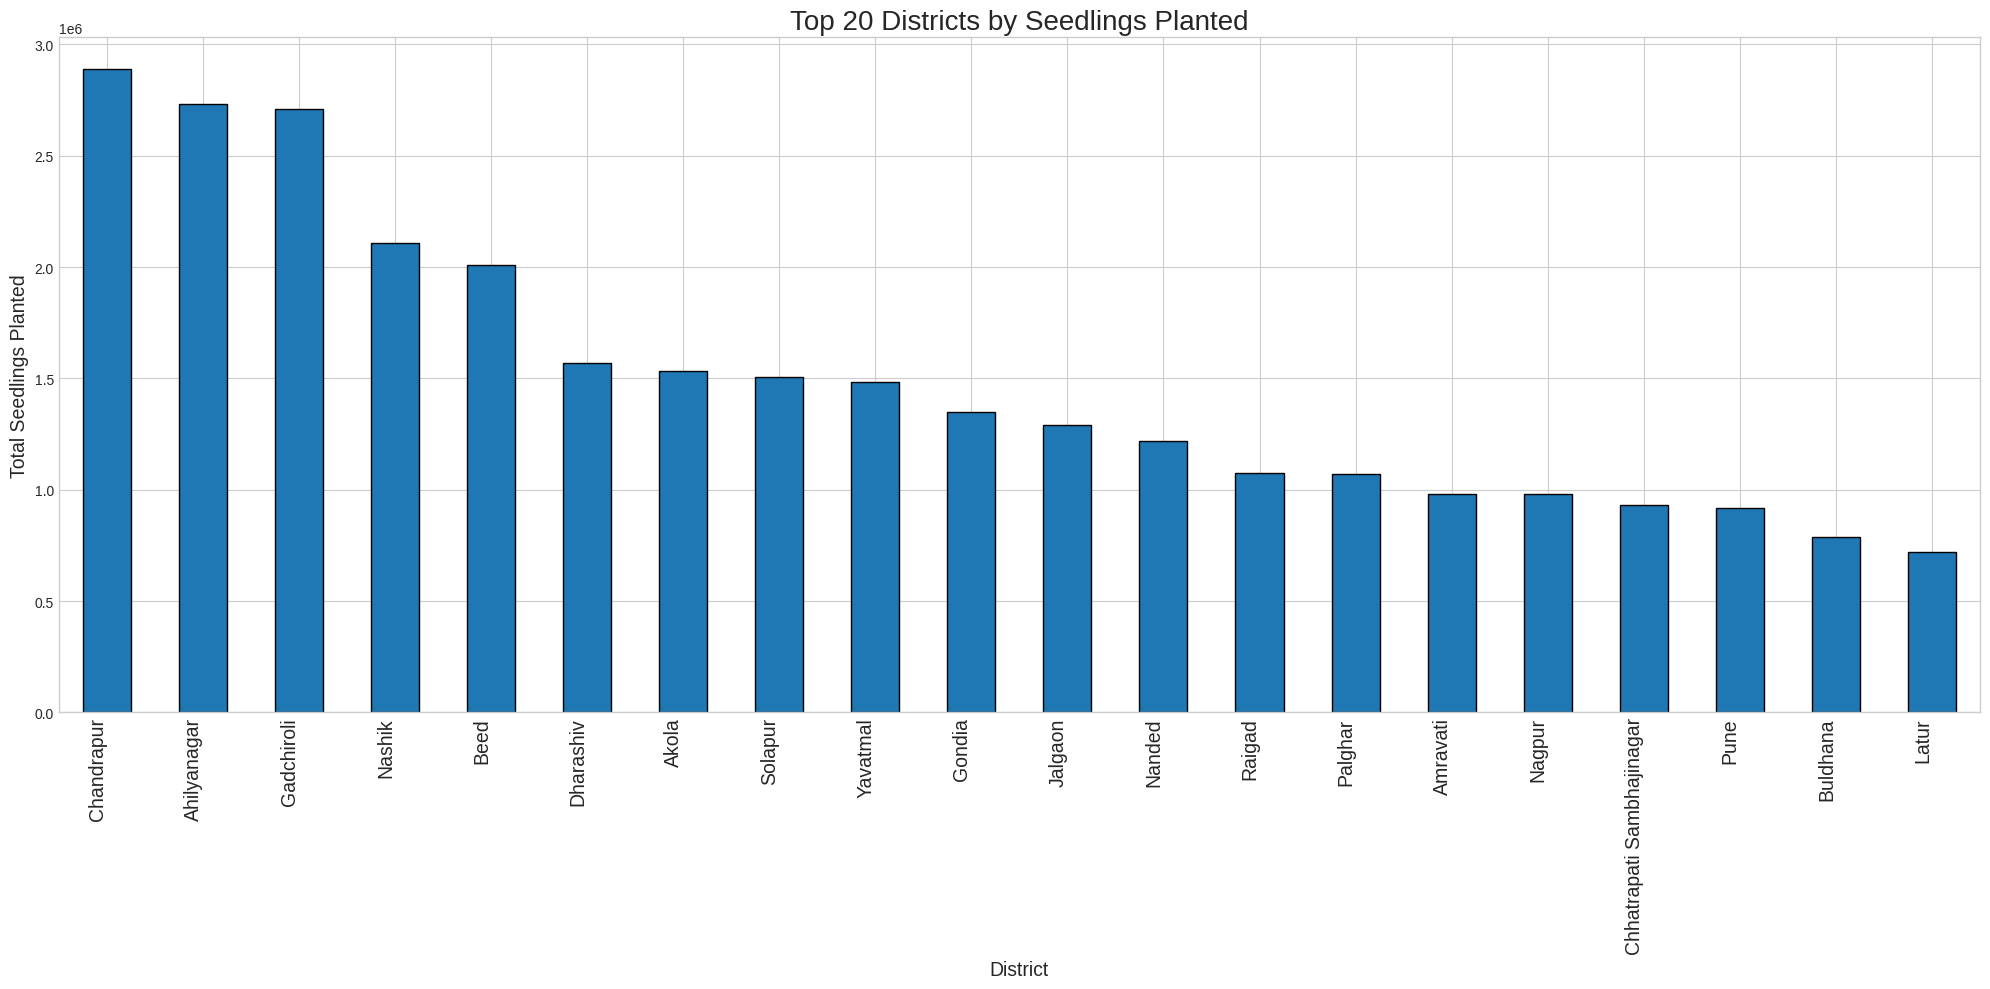

In [4]:
required_cols = ['District', 'No. of Seedling Planted']
df_without_total = df[df['District'].str.lower() != 'total'] if 'District' in df.columns else df.copy()

agg = df_without_total.groupby('District')['No. of Seedling Planted'].sum()
top20 = agg.sort_values(ascending=False).head(20)
plt.figure(figsize=(20,10))
ax = top20.plot(kind='bar', color='tab:blue', edgecolor='k')
ax.set_xlabel('District', fontsize=14)
ax.set_ylabel('Total Seedlings Planted', fontsize=14)
ax.set_title('Top 20 Districts by Seedlings Planted', fontsize=20)
plt.xticks(rotation=90, ha='right', fontsize=14)
plt.tight_layout()
plt.show()